<a href="https://colab.research.google.com/github/depresssed-kid/air_pollution_classification/blob/main/air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.3.1

# Prepare the date

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import yellowbrick.classifier as ybc
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing  import OrdinalEncoder
from sklearn.metrics import accuracy_score
from yellowbrick.target import ClassBalance
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [29]:
air = pd.read_csv('updated_pollution_dataset.csv')
air.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


# Еxploratory data analysis

In [30]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'PM2.5'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'Proximity_to_Industrial_Areas'}>,
        <Axes: title={'center': 'Population_Density'}>]], dtype=object)

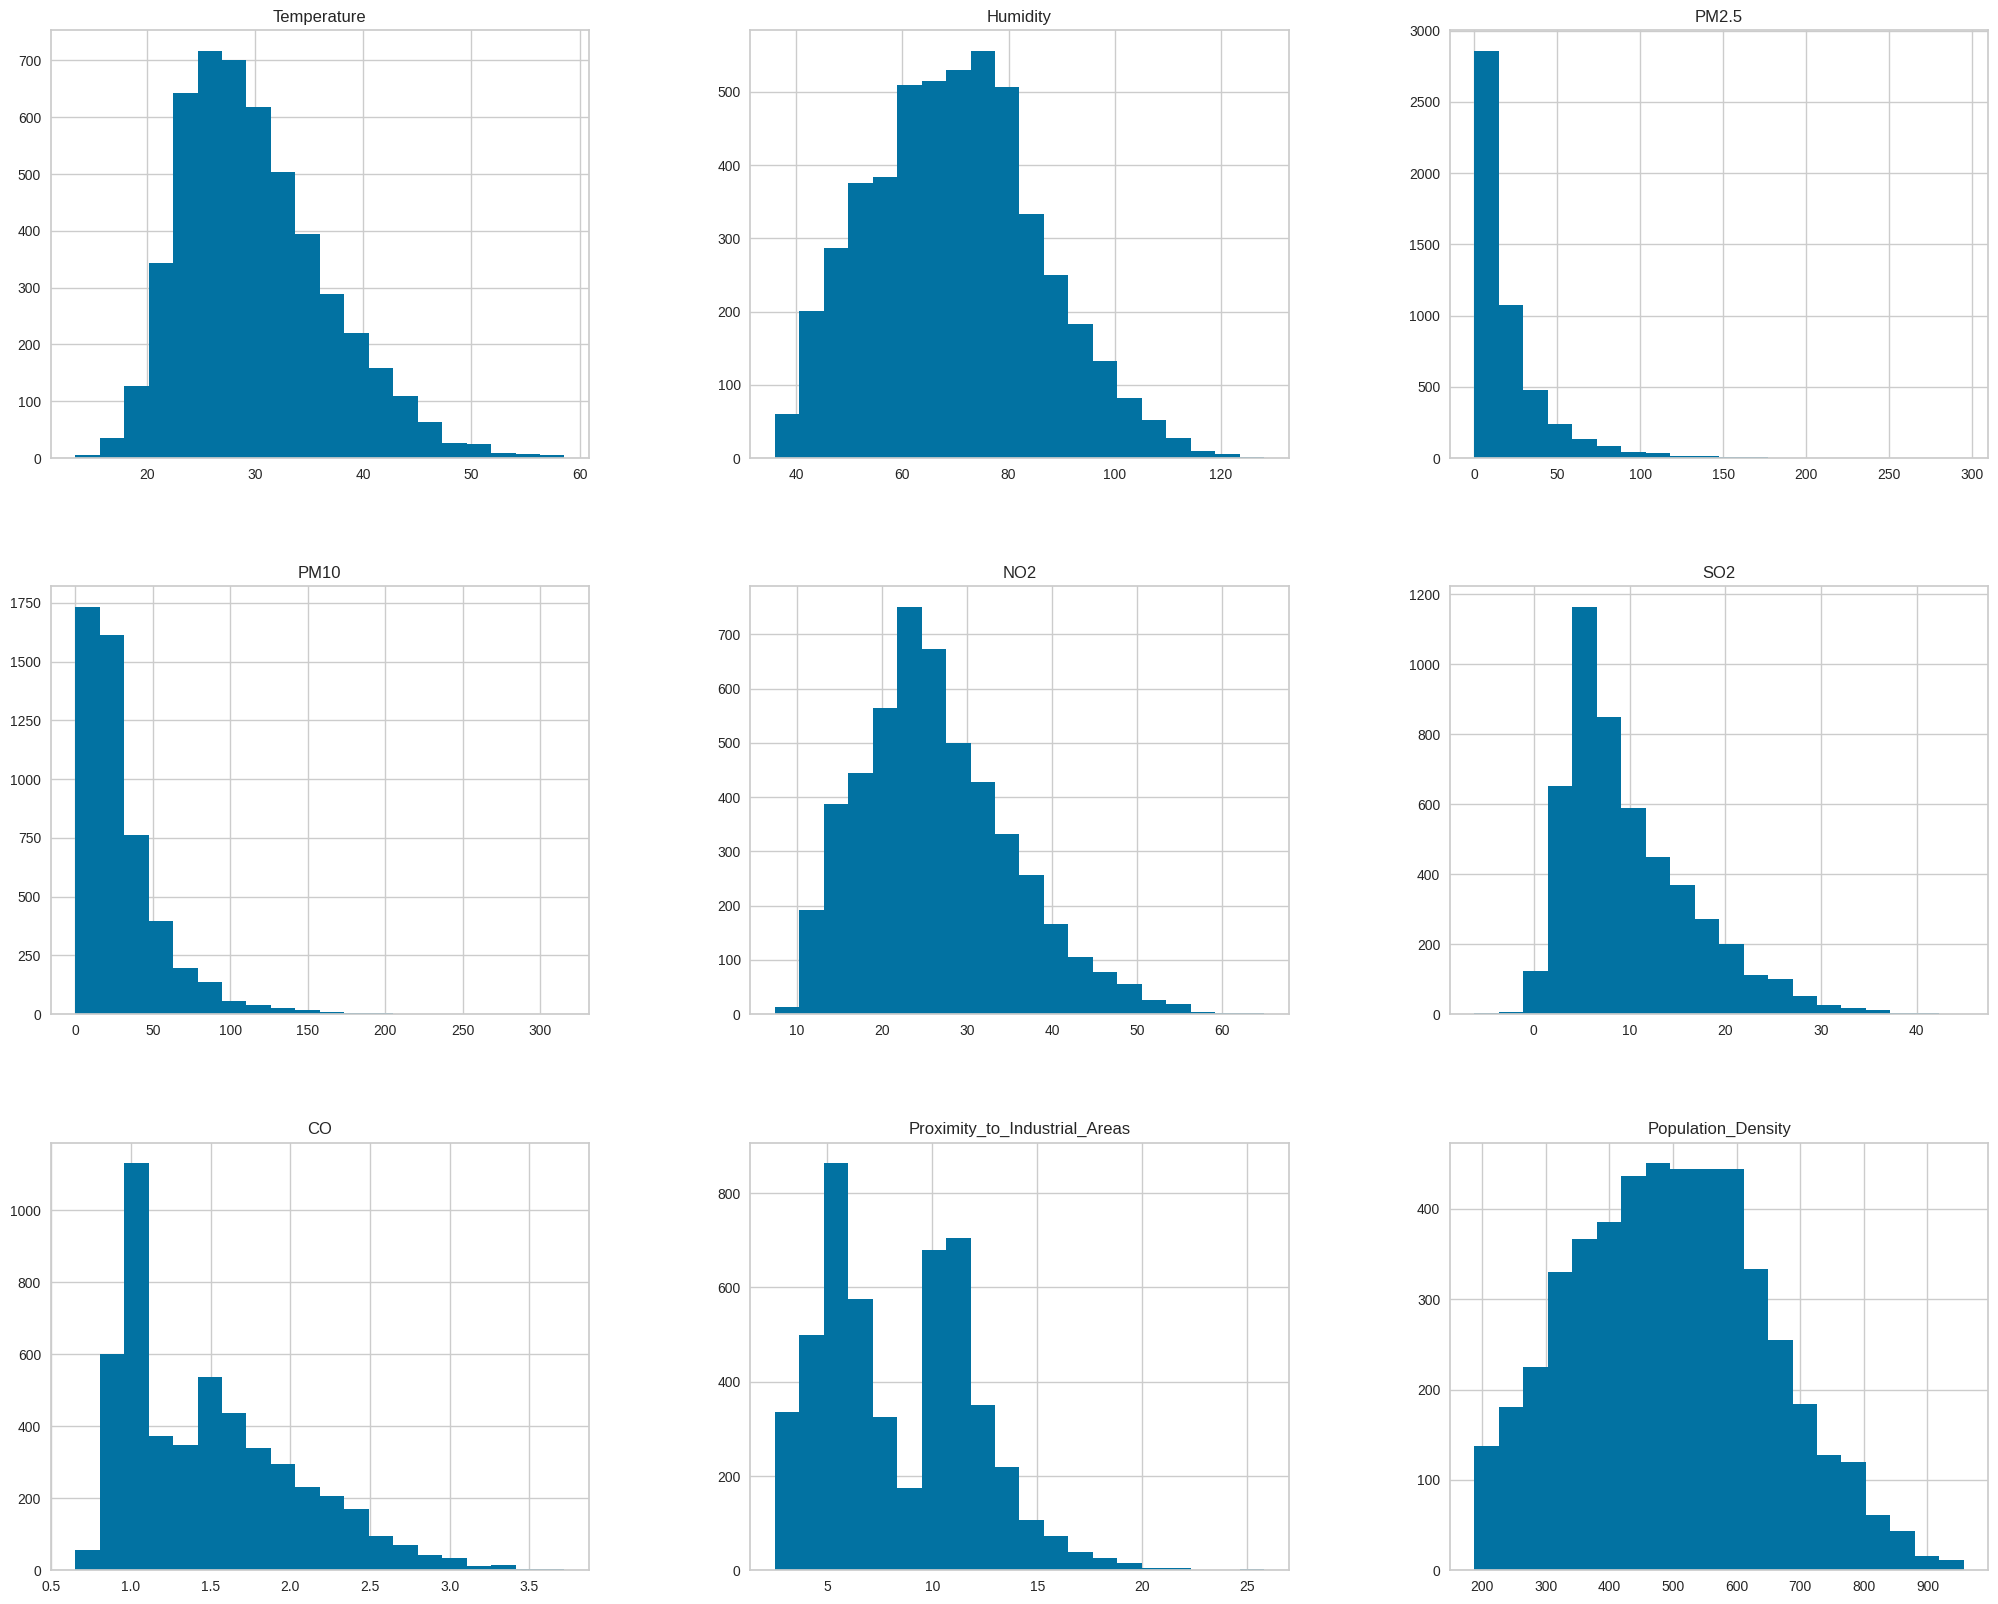

In [31]:
air.hist(bins=20, figsize=(25, 20))

<Axes: >

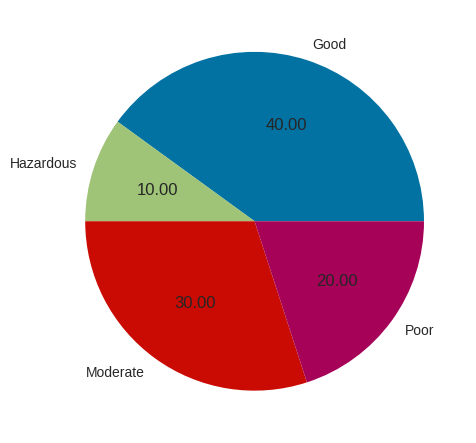

In [32]:
air.groupby('Air Quality').size().plot(kind='pie', autopct='%.2f')

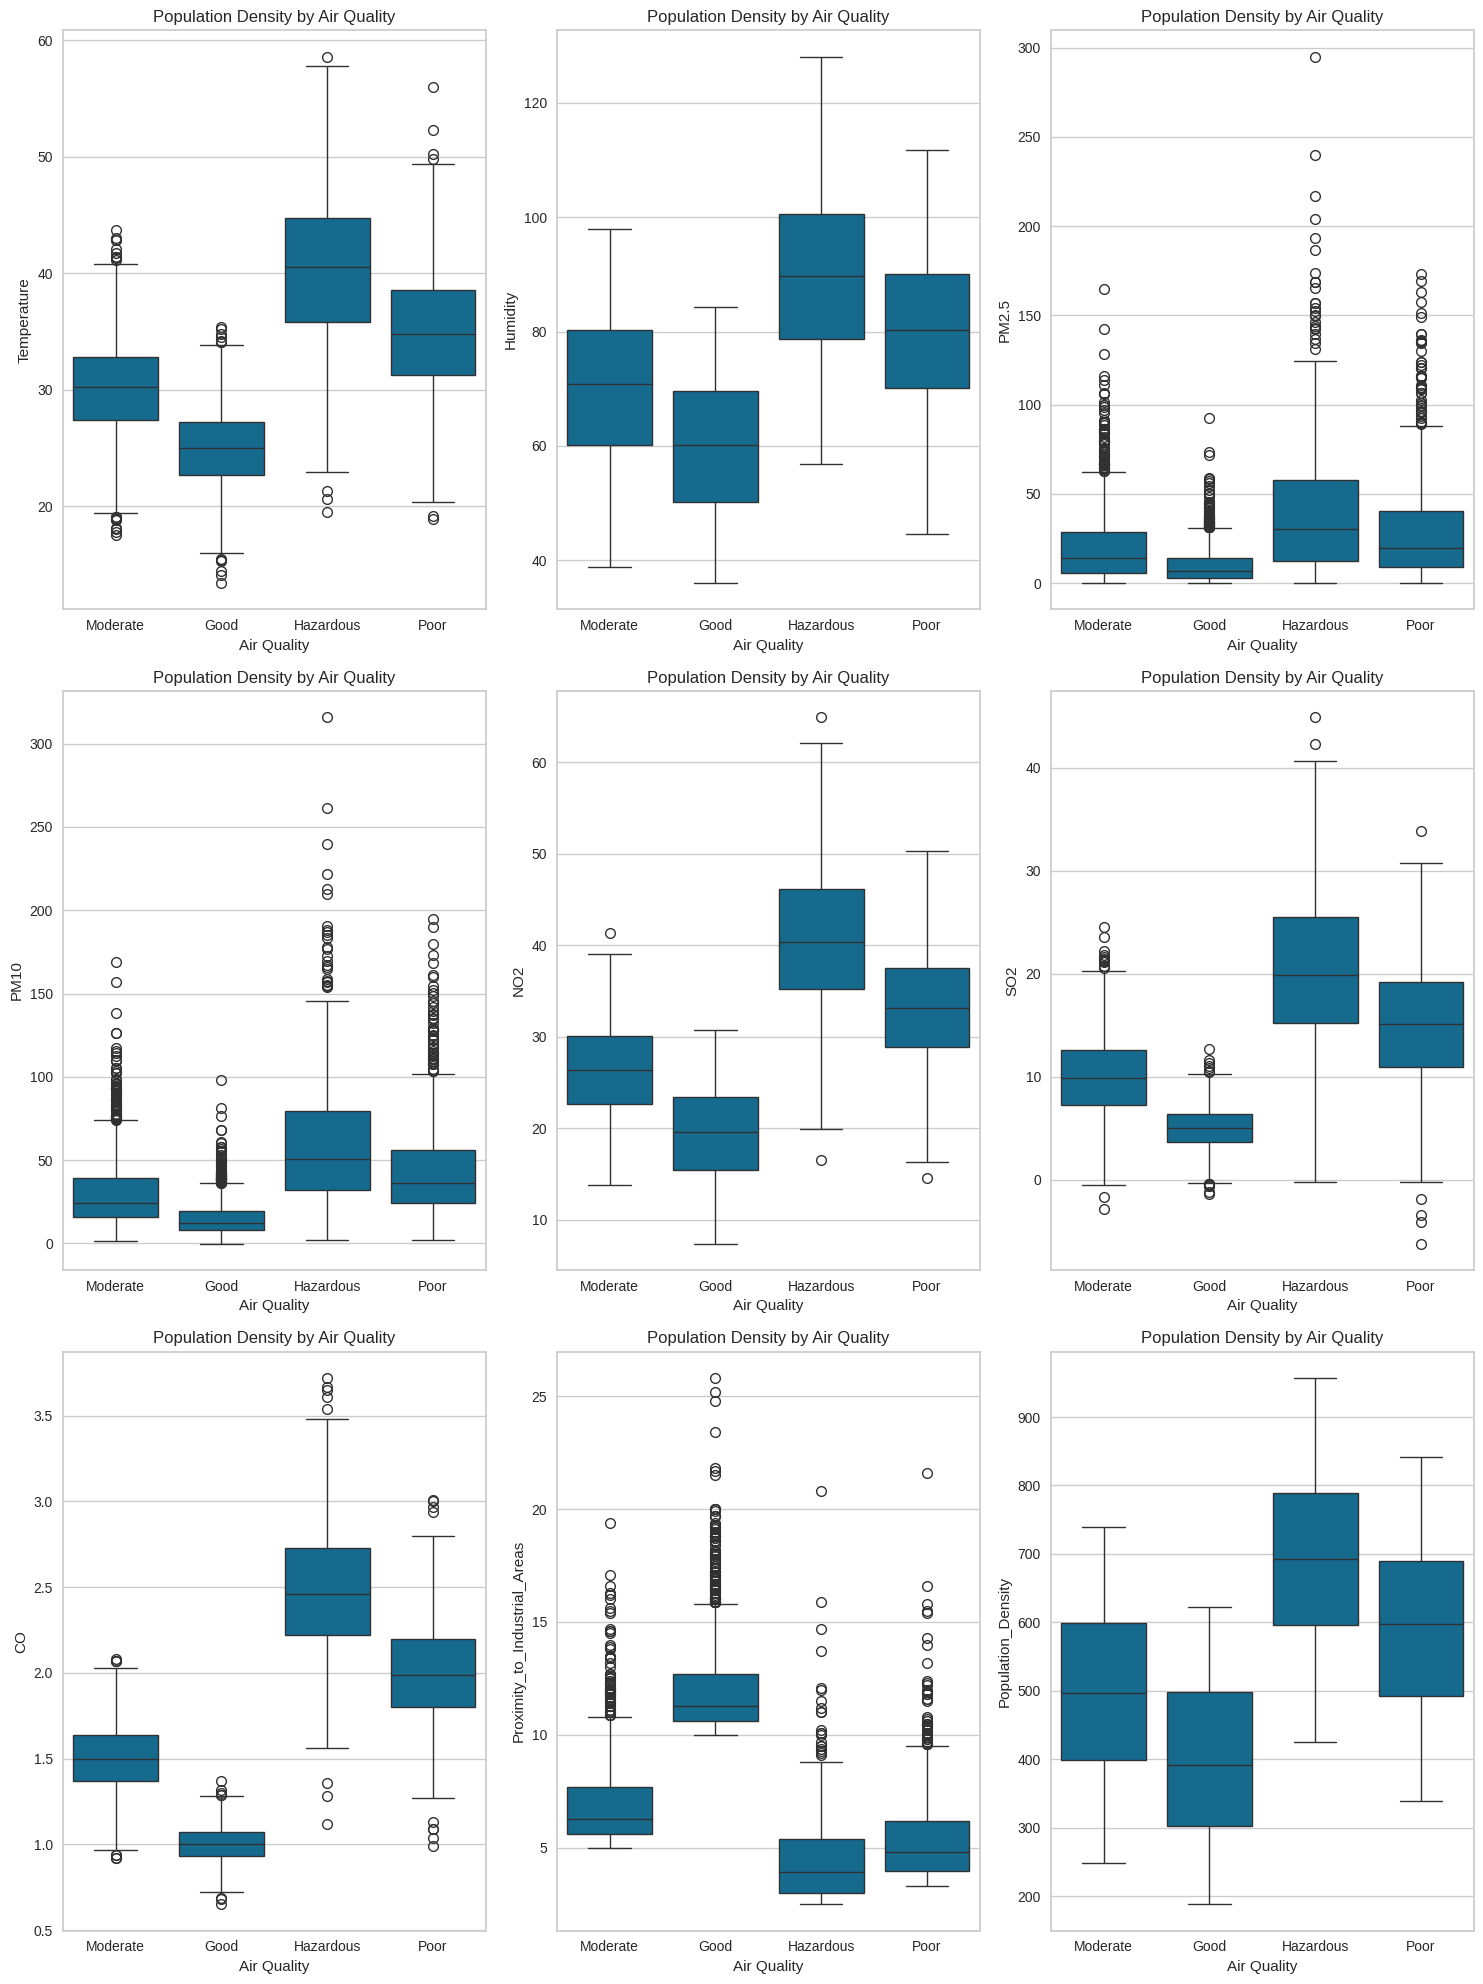

In [33]:
fig, axs = plt.subplots(3, 3, figsize=(15, 20))
axs = axs.flatten()
for i, col in enumerate(air.columns.drop('Air Quality')):
    sns.boxplot(x='Air Quality', y=air[col], data=air, ax=axs[i])
    axs[i].set_title('Population Density by Air Quality')
plt.tight_layout()
plt.show()

In [34]:
quality = ['Hazardous','Poor','Moderate','Good']
le = OrdinalEncoder(categories=[quality])
air['Air Quality'] = le.fit_transform(air[['Air Quality']])
air.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2.0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2.0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2.0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,3.0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,3.0


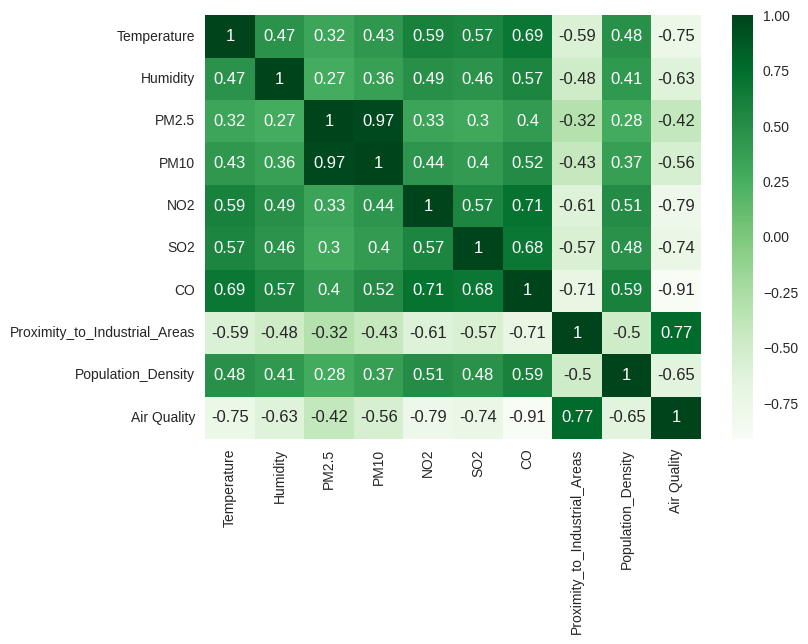

In [35]:
correlation_matrix = air.corr()
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns.values,
            yticklabels=correlation_matrix.columns.values,  cmap="Greens", annot=True)
plt.show()

# Splitting into training and test samples

In [36]:
X = air.drop('Air Quality', axis=1)
y = air['Air Quality']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X_train), len(y_train)

(4000, 4000)

# Checking the class balance

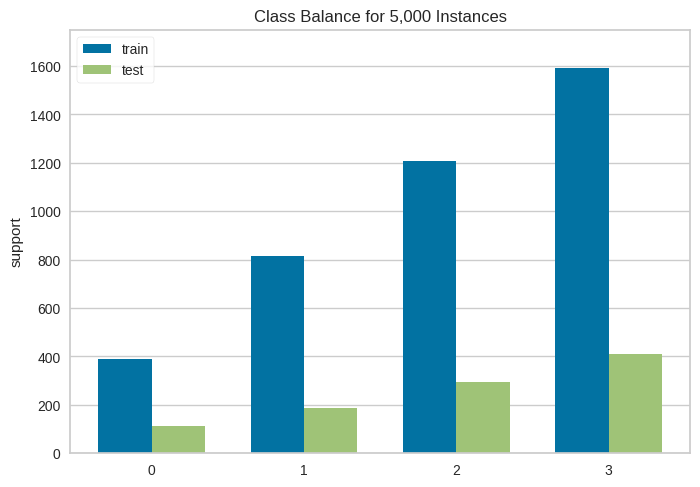

<Axes: title={'center': 'Class Balance for 5,000 Instances'}, ylabel='support'>

In [37]:
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

# Model training

In [38]:
lmodel = lgb.LGBMClassifier(random_state=42)
lmodel.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2188
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 9
[LightGBM] [Info] Start training from score -2.330470
[LightGBM] [Info] Start training from score -1.592089
[LightGBM] [Info] Start training from score -1.198985
[LightGBM] [Info] Start training from score -0.921932
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [39]:
xmodel = xgb.XGBClassifier(random_state=42)
xmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [40]:
rfmodel = RandomForestClassifier(random_state=42)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
params = {
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bynode': 0.75,
    'max_depth': 30,
    'random_state': 42
}
xrfmodel = xgb.XGBRFClassifier(**params)
xrfmodel.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=0.75,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=30, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=42, ...)

# Quality metrics

In [42]:
ly_pred = lmodel.predict(X_test)
laccuracy = accuracy_score(y_test, ly_pred)
print(f'LGBModel accuracy: {laccuracy}')

xy_pred = xmodel.predict(X_test)
xaccuracy = accuracy_score(y_test, xy_pred)
print(f'XGBModel accuracy: {xaccuracy}')

rfy_pred = rfmodel.predict(X_test)
rfaccuracy = accuracy_score(y_test, rfy_pred)
print(f'Random Forest accuracy: {rfaccuracy}')

xrfy_pred = xrfmodel.predict(X_test)
xrfaccuracy = accuracy_score(y_test, xrfy_pred)
print(f'XGB Random forest accuracy: {xrfaccuracy}')

LGBModel accuracy: 0.961
XGBModel accuracy: 0.961
Random Forest accuracy: 0.961
XGB Random forest accuracy: 0.958


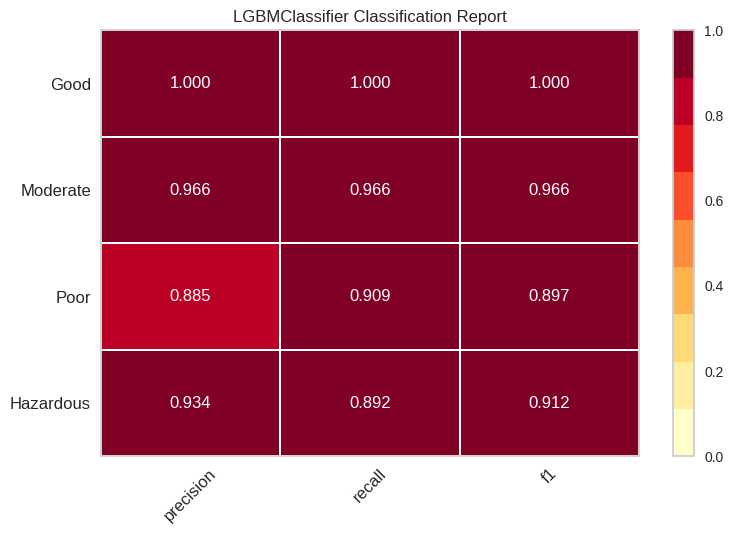

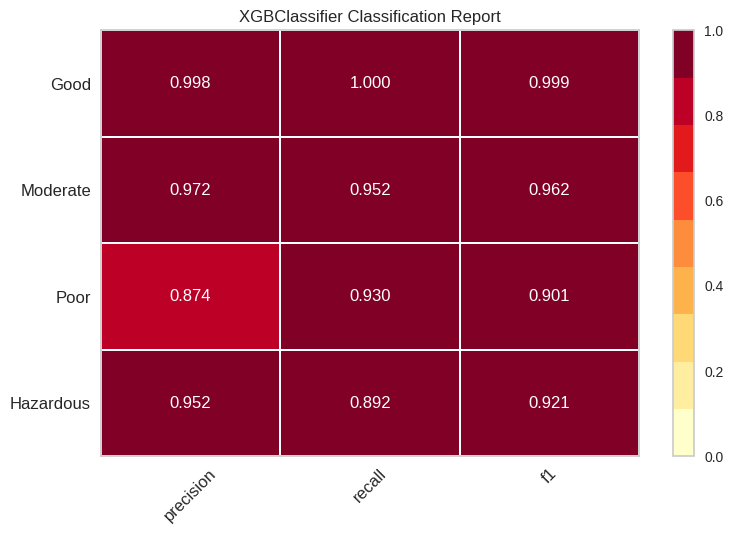

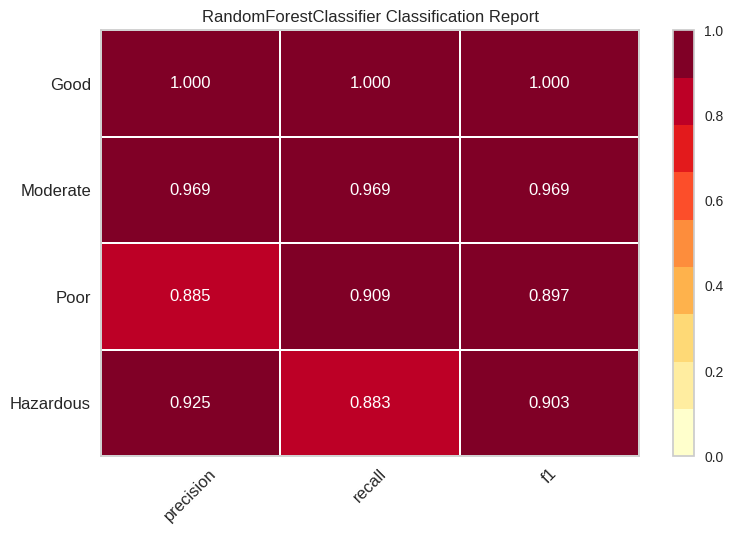

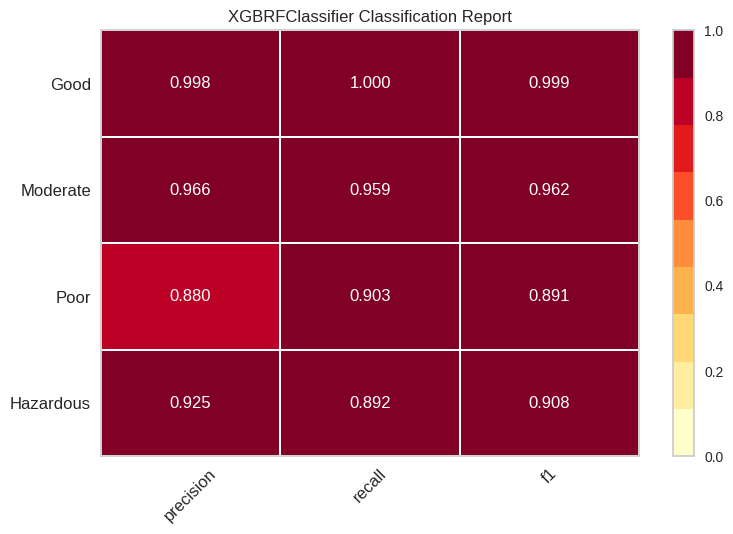

In [43]:
models = [lmodel,xmodel,rfmodel,xrfmodel]
for model in models:
  cr = ybc.ClassificationReport(model, classes=['Hazardous','Poor','Moderate','Good'])
  cr.fit(X_train, y_train)
  cr.score(X_test, y_test)
  cr.show()

# Confusion matrices

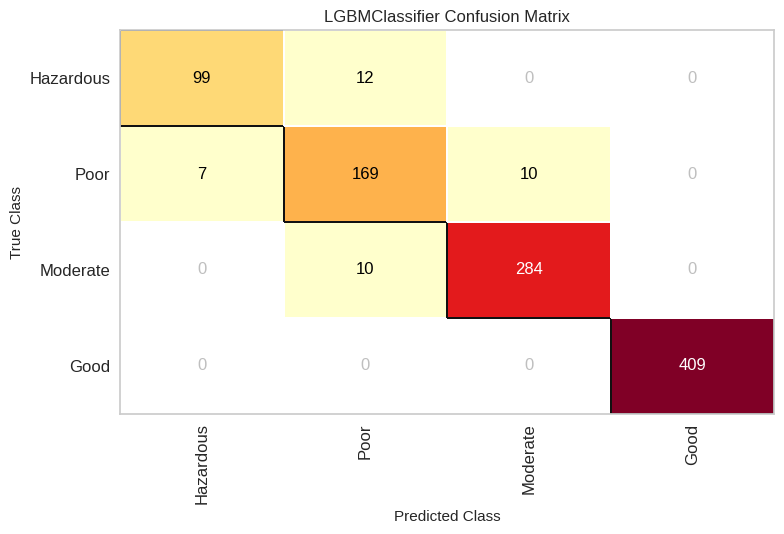

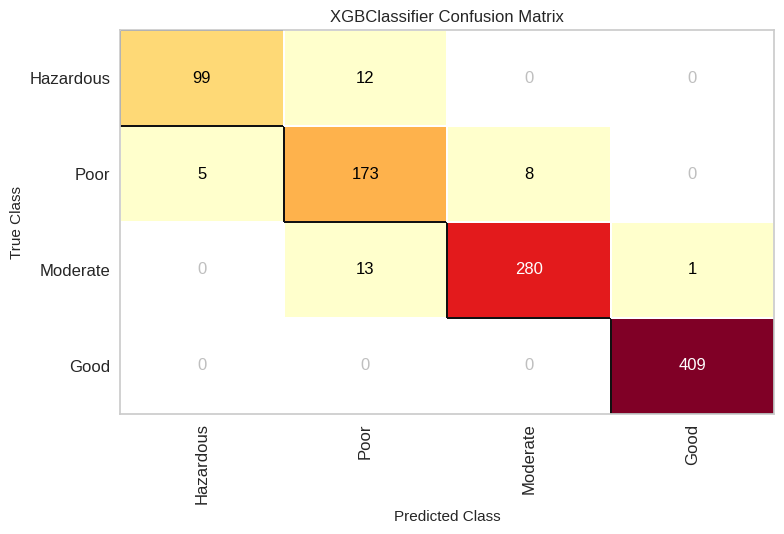

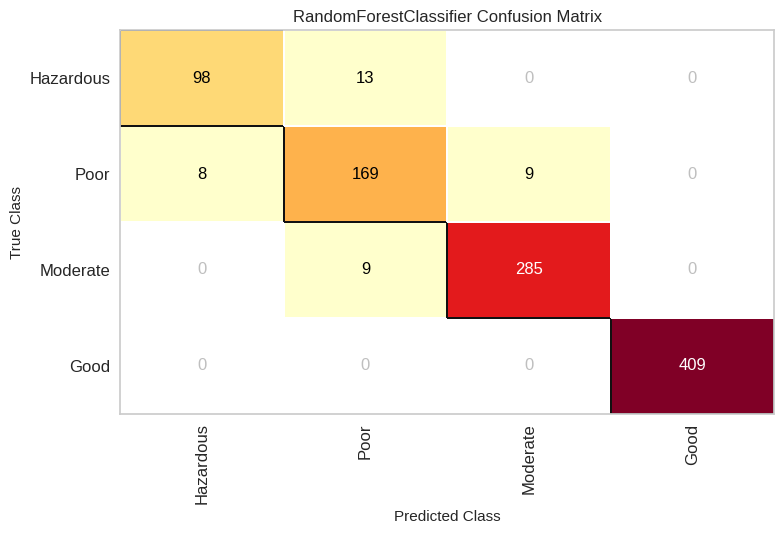

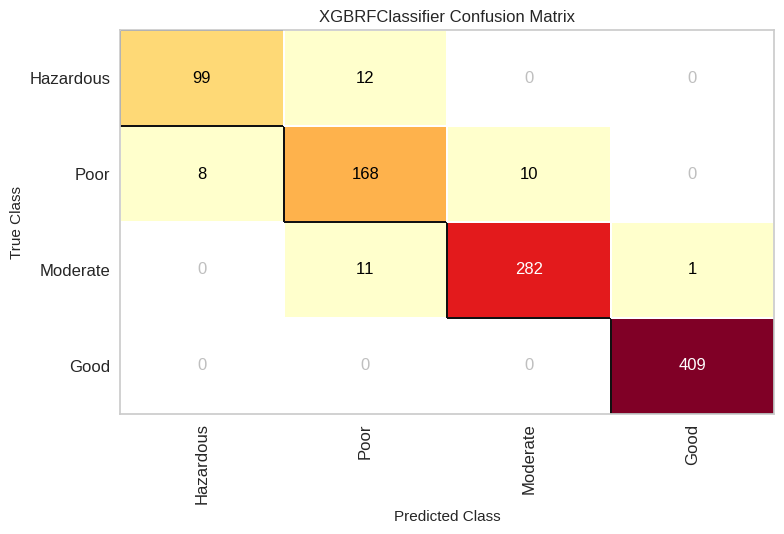

In [44]:
for model in models:
  cm = ybc.ConfusionMatrix(
    model, classes=['Hazardous','Poor','Moderate','Good'])
  cm.fit(X_train, y_train)
  cm.score(X_test, y_test)
  cm.show()